##**שער**

### לוגו ושם בית ספר

עירוני ד

<div dir="rtl">
    <img src="../../shared/pics/school_logo.jpeg" />
</div>

### שם התלמיד + ת"ז

### שם המחקר

האם הפטריות אכילות או רעילות

### שנת לימודים

תשפ"ד, 2023-2024

### שם המורה

איתי בארלי

## **נושא המחקר**

### הקדמה

מטרת הפרויקט היא לחזות עם פטריה היא אכילה או רעילה בעזרת נתונים עלייה ואלגוריתמי סיווג



### תמונה הקשורה למאגר הנתונים או לפרוייקט

<img src="pics/illustration.png" />

# <span dir = "rtl">תיאור הנתונים</span>


<div dir= rtl>
בטבלה יש 61069 שורות ו - 21 עמודות, בטבלה 18 עמודות קטגוריאליות ו - 3 עמודות מספריות.
תיאור העמודות:
1. class - dicates mushroom edibility (poisonous=p, edible=e)
2. cap-diameter - Diameter of the mushroom cap in cm
3. cap-shape - Shape of the mushroom cap (bell (b) conical (c) convex (x) flat (f) sunken (s) spherical (p) others (o) for any other shape).
4. cap-surface - Texture of the mushroom cap surface (fibrous (i) grooves (g) scaly (y) smooth (s) shiny (h) leathery (l) silky (k) sticky (t) wrinkled (w) fleshy (e)).
5. cap-color - The color of the mushroom cap, with various options such as brown, buff, gray, green, pink, purple, red, white, yellow, blue, orange, and black.
6. does-bruise-or-bleed - Indicates whether the mushroom bruises or bleeds when injured.
7. gill-attachment - How gills are attached to the stem, where: adnate (a) adnexed (x) decurrent (d) free (e) sinuate (s) pores (p) none (f) unknown (?)
8. gill-spacing - Spacing between gills, where: close (c) distant (d) none (f)
9. gill-color - Color of the gills (brown, buff, gray, green, pink, purple, red, white, yellow, blue, orange, and black and none).
10. stem-height - Height of the mushroom stem in cm.
11. stem-width - Width of the mushroom stem in mm.
12. stem-root - Structure of the stem's root, where: bulbous (b) swollen (s) club (c) cup (u) equal (e) rhizomorphs (z) rooted (r).
13. stem-surface - Texture of the mushroom stem surface(fibrous (i) grooves (g) scaly (y) smooth (s) shiny (h) leathery (l) silky (k) sticky (t) wrinkled (w) fleshy (e) and none(f)).
14. stem-color - Color of the mushroom stem, with various options such as brown, buff, gray, green, pink, purple, red, white, yellow, blue, orange, and black.
15. veil-type - Type of veil covering the gills, partial (p) universal (u)
16. veil-color - Color of the veil, with various options such as brown, buff, gray, green, pink, purple, red, white, yellow, blue, orange, and black.
17. has-ring - Presence of a ring on the mushroom, where: ring (t) none (f).
18. Type of ring present, cobwebby (c) evanescent (e) flaring (r) grooved (g) large (l) pendant (p) sheathing (s) zone (z) scaly (y) movable (m) none (f) unknown (?).
19. spore-print-color - Color of the mushroom spore print, brown, buff, gray, green, pink, purple, red, white, yellow, blue, orange, and black.
20. habitat - Environment where the mushroom is found, grasses (g) leaves (l) meadows (m) paths (p) heaths (h) urban (u) waste (w) woods (d).
21. Season - when the mushroom is commonly observed, spring (s) summer (u) autumn (a) winter (w).
</div>

# <span dir = "rtl">ייבוא ספריות</span>

<div dir="rtl">
<p>
הספריה feture-engine נדרשת בשביך המחלקה Winsorizer שמטפלת בחריגים
</P>
</div>

In [1]:
#imports
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as lrn

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,\
                                  TargetEncoder, \
                                  MaxAbsScaler, MinMaxScaler, \
                                  StandardScaler, RobustScaler

from feature_engine.outliers import Winsorizer

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, \
                            make_scorer, accuracy_score, f1_score, recall_score

from os import path

In [2]:
import sys
sys.path.append('../../')

from shared.code import helpers

# <span dir = "rtl">טעינת הטבלה והכנה ראשונית</span>

### <span dir = "rtl">זרע האקראיות</span>

In [3]:
seed = 172

### <span dir = "rtl"> מחיקת עמודות עם מעט ערכים</span>

## <span dir = "rtl">טעינת הטבלה</span>


In [4]:
#import the dataset from drive
orig = pd.read_csv('data/static/dataset.csv')
orig

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  stem-root stem-surface stem-color veil-type  \
0            16.95  ...          s            y          w         u   
1            17.99  ...          s            y          w         u   
2            17.80  ...          s            y          w         u   
3            15.77  ...          s            y          w         u   
4            16.53  ...          s            y          w         u   
...            ...  ...        ...          ...        ...       ...   
61064         3.93  ...        NaN          NaN          y       NaN   
61065         3.18  ...        NaN          NaN          y       NaN   
61066         3.86  ...        NaN          NaN          y       NaN   
61067         3.56  ...        NaN          NaN          y       NaN   
61068         3.25  ...        NaN          NaN          y       NaN   

      veil-color has-ring ring-type spore-print-color habitat season  
0              w        t         g               NaN       d      w  
1              w        t         g               NaN       d      u  
2              w        t         g               NaN       d      w  
3              w        t         p               NaN       d      w  
4              w        t         p               NaN       d      w  
...          ...      ...       ...               ...     ...    ...  
61064        NaN        f         f               NaN       d      a  
61065        NaN        f         f               NaN       d      a  
61066        NaN        f         f               NaN       d      u  
61067        NaN        f         f               NaN       d      u  
61068        NaN        f         f               NaN       d      u  

[61069 rows x 21 columns]

## <span dir = "rtl"> הפרדה ל - X ו - Y</span>

In [5]:
target = 'class'

In [6]:
X,y = orig.drop(target, axis= 1), orig[target].copy()
#division to X and y

## <span dir = "rtl">הכנה ראשונית של נתונים</span>


### <span dir = "rtl"> מחיקת שורת שבהן אין ב - Y ערך</span>


In [7]:
y.isna().sum()
#check for cells in y

np.int64(0)

### <span dir = "rtl"> מחיקת שורת שבהן אין ב - X ערך</span>


In [8]:
X.isna().all().sum()
#check for empty rows in X

np.int64(0)

### <span dir = "rtl">כפילויות</span>


In [9]:
X.duplicated().sum()/X.shape[0]*100
#check the precent of diplicated rows in X

np.float64(0.23907383451505673)

In [10]:
X.drop_duplicates(inplace= True)
#dropping the duplicated rows in X
y = y[X.index]
#getting the same rows from X in y

### <span dir = "rtl">צמצום שורות</span>

In [11]:
X.shape[0]

60923

In [12]:
X = X.sample(n = 10000, random_state= seed)
# making X 10000 rows and with random_state taking each time the same rows

In [13]:
y = y[X.index]
#making y to be with the samr rows as X

### <span dir = "rtl"> מחיקת עמודות עם מעט ערכים</span>


In [14]:
filled_cutoff = 0.5

In [15]:
filled_ratio = (~X.isna()).sum() / X.shape[0]
filled_ratio
#the ratio between the number of cells in each column with value to the number of cells in the column

cap-diameter            1.0000
cap-shape               1.0000
cap-surface             0.7725
cap-color               1.0000
does-bruise-or-bleed    1.0000
gill-attachment         0.8400
gill-spacing            0.5889
gill-color              1.0000
stem-height             1.0000
stem-width              1.0000
stem-root               0.1567
stem-surface            0.3840
stem-color              1.0000
veil-type               0.0535
veil-color              0.1219
has-ring                1.0000
ring-type               0.9608
spore-print-color       0.1030
habitat                 1.0000
season                  1.0000
dtype: float64

In [16]:
empty_cols = filled_ratio[filled_ratio < filled_cutoff].index.to_list()
#checks which columns have less filled ratio than the cutoff (here its 0.5)
empty_cols

['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']

In [17]:
X.drop(empty_cols, axis= 1, inplace= True)
#drops the columns from X that in empty_cols

In [18]:
X.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

### <span dir = "rtl"> מחיקת עמודות עם הרבה ערכים</span>


In [19]:
saturated_ratio = X.nunique() / X.shape[0]
#shows the ratio between the unique values in each columns to number of cells in each column
saturated_ratio

cap-diameter            0.1761
cap-shape               0.0007
cap-surface             0.0011
cap-color               0.0012
does-bruise-or-bleed    0.0002
gill-attachment         0.0007
gill-spacing            0.0003
gill-color              0.0012
stem-height             0.1475
stem-width              0.2954
stem-color              0.0013
has-ring                0.0002
ring-type               0.0008
habitat                 0.0008
season                  0.0004
dtype: float64

### <span dir = "rtl">הפיכת עמודה המטרה למספרית</span>


In [20]:
y.unique()
#show the unique values in y

array(['p', 'e'], dtype=object)

In [21]:
y = pd.Series(data= LabelEncoder().fit_transform(y), name= target)
#make the values in y numerical

In [22]:
y.sum()

np.int64(5587)

## <span dir = "rtl">הפרדה ל - train  ו - test</span>


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= seed,
                                                    stratify = y)
#division to train and test - in the 'competition' the participant trains on the the X_test, y_test datasets and tries to predict the y_test based on the X_test
#splits X and y to 2 parts, train (0.8 of the data) and test (0.2 of the data), randomaly

# <span dir = "rtl">חקר נתונים</span>

## <span dir = "rtl">הצגת נתונים על המאגר</span>


<div div= "rtl">
<p>
info
ו-
describe
</p>
</div>

In [24]:
X_train.head()

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
43217          8.03         x           y         w                    t   
12220          4.45         f           w         u                    f   
25433          9.17         x           t         e                    f   
40141          3.22         f         NaN         u                    f   
42462          6.43         x           y         n                    f   

      gill-attachment gill-spacing gill-color  stem-height  stem-width  \
43217             NaN          NaN          p         9.14       15.57   
12220               a            c          u         7.43        6.53   
25433               x            d          w         5.49       18.09   
40141               a            c          n         3.95        3.64   
42462               e            c          p         4.24       11.80   

      stem-color has-ring ring-type habitat season  
43217          w        t         l       g      u  
12220          u        f         f       l      u  
25433          w        f         f       d      a  
40141          u        f         f       p      a  
42462          w        t         l       w      a

In [25]:
X_train.info()
#shows the number of cells that has value un each column and the type of the value

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 43217 to 44081
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          8000 non-null   float64
 1   cap-shape             8000 non-null   object 
 2   cap-surface           6193 non-null   object 
 3   cap-color             8000 non-null   object 
 4   does-bruise-or-bleed  8000 non-null   object 
 5   gill-attachment       6705 non-null   object 
 6   gill-spacing          4684 non-null   object 
 7   gill-color            8000 non-null   object 
 8   stem-height           8000 non-null   float64
 9   stem-width            8000 non-null   float64
 10  stem-color            8000 non-null   object 
 11  has-ring              8000 non-null   object 
 12  ring-type             7682 non-null   object 
 13  habitat               8000 non-null   object 
 14  season                8000 non-null   object 
dtypes: float64(3), object

In [26]:
X_train.select_dtypes(include= 'object').nunique().sort_values()
#shows the number of unique values in each columns in X_train

does-bruise-or-bleed     2
has-ring                 2
gill-spacing             3
season                   4
gill-attachment          7
cap-shape                7
habitat                  8
ring-type                8
cap-surface             11
cap-color               12
gill-color              12
stem-color              13
dtype: int64

## <span dir = "rtl">GroupBy</span>


## <span dir = "rtl">גרפים</span>


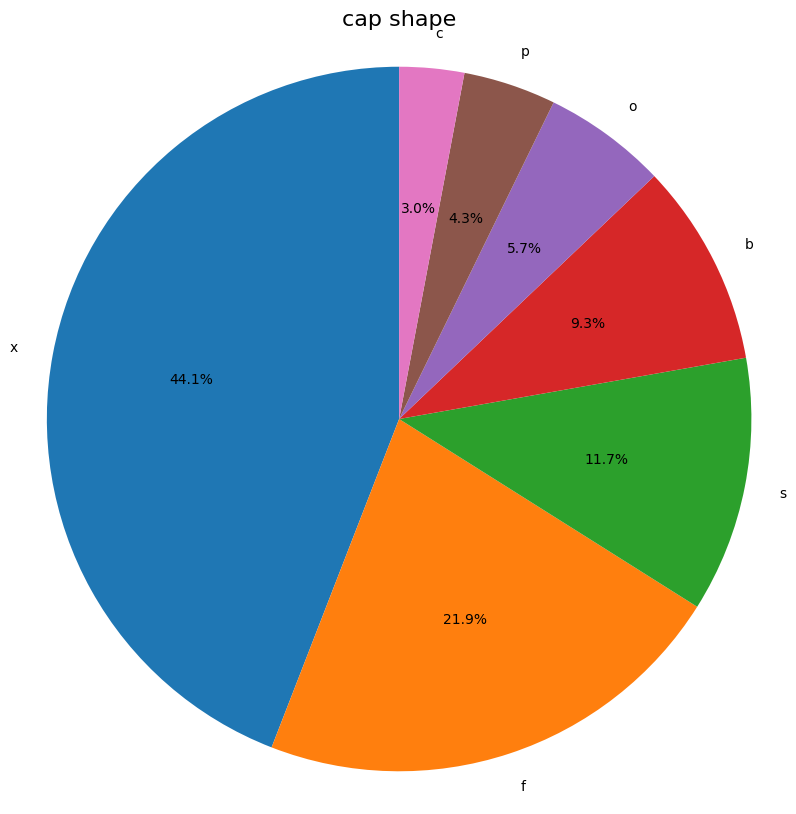

In [27]:
labels = orig['cap-shape'].value_counts().index.tolist()

plt.figure(figsize = (10, 10))
plt.pie(orig['cap-shape'].value_counts(), labels = labels, autopct = '%1.1f%%', startangle = 90)
plt.title('cap shape', fontsize = 16)
plt.axis('equal')
plt.show()

<div dir=rtl>
ניתן לראות שהצורה הקמורה היא הנפוצה ביותר וכמותה גדולה פי שניים מהצורה השטוחה ושתיהן ביחד ניצפו בשני שלישים מהמקרים.
 </div>

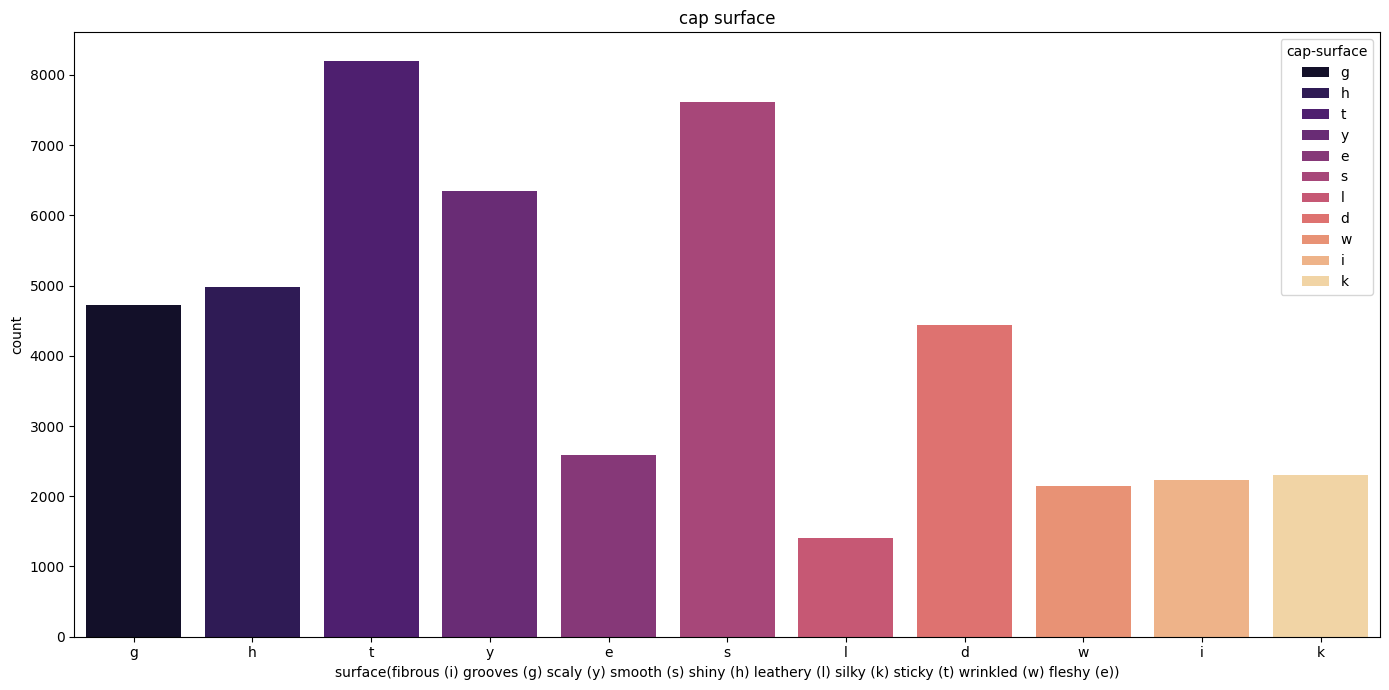

In [28]:
plt.figure(figsize=(14, 7))
sns.countplot(data= orig, x = 'cap-surface', palette = 'magma', hue = 'cap-surface')
plt.title('cap surface')
plt.xlabel('surface(fibrous (i) grooves (g) scaly (y) smooth (s) shiny (h) leathery (l) silky (k) sticky (t) wrinkled (w) fleshy (e))')
plt.ylabel('count')
plt.tight_layout()
plt.show()


<div dir= 'rtl'>
ניתן להסיק מהגרף ש - wrinkled, leathery, silky, fibrous ו - fleshy אלה מרקמים שנדיר יותר למצוא, לעומת smooth, scaly, shiny, grooves, sticky שהם יותר נפוצים.
</div>

## <span dir = "rtl">מטריצות מתאם לעמודות המספריות עם עמודות המטרה</span>


# <span dir = "rtl">עיבוד נתונים</span>

In [29]:
lrn.set_config(transform_output= 'pandas')
#makes the output to be a dataset

## <span dir = "rtl">קבוצות עמודות</span>


In [30]:
X_train.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

In [31]:
num_cols = X_train.select_dtypes('float').columns.to_list()
nom_cols = X_train.select_dtypes('object').columns.to_list()

In [32]:
nom_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [33]:
num_cols

['cap-diameter', 'stem-height', 'stem-width']

## <span dir = "rtl">המרות</span>


<div dir= "rtl">
<p>
אין צורך
</p>
</div>

## <span dir = "rtl">ערכים חסרים</span>


In [34]:
impute_num_action = SimpleImputer()
#impute_num_actionr puts the mean value in the numerical empty cells
impute_nom_action = SimpleImputer(strategy= 'most_frequent')
#impute_nom_action fills the empty cells with the most frequent value in this column

In [35]:
impute_transformers = [('num', impute_num_action, num_cols),
                      ('nom',impute_nom_action, nom_cols)]
#setting the imputers in in lists of tuples for action

In [36]:
impute_action = ColumnTransformer(transformers= impute_transformers,
                                  remainder= 'passthrough',
                                  n_jobs= -1,
                                  verbose_feature_names_out= False,
                                  force_int_remainder_cols=False)
#filling the empty cells with values

## <span dir = "rtl">עמודות שמיות למספריות</span>


In [37]:
nom_to_num_nom_action = OneHotEncoder(sparse_output= False,
                                  handle_unknown= 'ignore')
#OneHotEncoder make binary column for each values in a column

In [38]:
nom_to_num_transformers = [('nom', nom_to_num_nom_action, nom_cols)]
#setting the tuple for the ColumnTransformer

In [39]:
nom_to_num_action = ColumnTransformer(transformers= nom_to_num_transformers,
                                      remainder= 'passthrough',
                                      n_jobs= -1,
                                      verbose_feature_names_out= False,
                                  force_int_remainder_cols=False)
#make a binary column for each categorial column

## <span dir = "rtl">חריגים</span>


In [40]:
outliers_num_action = Winsorizer()
#Winsorizer caps maximum and minimum values

In [41]:
outliers_transformers = [('num', outliers_num_action, num_cols)]
#setting the tuple for the ColumnTransformer

In [42]:
outliers_action =  ColumnTransformer(transformers= outliers_transformers,
                                      remainder= 'passthrough',
                                      n_jobs= -1,
                                      verbose_feature_names_out= False,
                                  force_int_remainder_cols=False)
#deal with columns that needs to be Winsorized

## <span dir = "rtl">תקנון</span>


In [43]:
scale_action = MinMaxScaler()
#scales each value and make him be in the range

## <span dir = "rtl">הפייפליין של עיבוד הנתונים</span>


In [44]:
preprocessor_steps = [('impute', impute_action),
                      ('nom_to_num', nom_to_num_action),
                      ('outliers', outliers_action),
                      ('scale', scale_action)]
#the steps to change the dataset in a grid

In [45]:
preprocessor = Pipeline(steps= preprocessor_steps)
#the pipeline for the transform of the dataset

In [46]:
X_preprocessed = preprocessor.fit_transform(X_train, y_train)
#fit_transform is used on the training data so that we can scale  the training data and also learn the scaling parameters
X_preprocessed

cap-diameter  stem-height  stem-width  cap-shape_b  cap-shape_c  \
43217      0.355209     0.543372    0.362719          0.0          0.0   
12220      0.187001     0.441713    0.152123          0.0          0.0   
25433      0.408772     0.326380    0.421425          0.0          0.0   
40141      0.129209     0.234827    0.084797          0.0          0.0   
42462      0.280032     0.252068    0.274893          0.0          0.0   
...             ...          ...         ...          ...          ...   
4040       0.165388     0.341837    0.086894          0.0          0.0   
36684      0.178074     0.464304    0.164470          1.0          0.0   
26156      0.520597     0.438146    0.571917          0.0          0.0   
26997      0.558185     0.373345    0.594980          0.0          0.0   
44081      0.518717     1.000000    0.294229          0.0          0.0   

       cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  ...  \
43217          0.0          0.0          0.0          0.0          1.0  ...   
12220          1.0          0.0          0.0          0.0          0.0  ...   
25433          0.0          0.0          0.0          0.0          1.0  ...   
40141          1.0          0.0          0.0          0.0          0.0  ...   
42462          0.0          0.0          0.0          0.0          1.0  ...   
...            ...          ...          ...          ...          ...  ...   
4040           0.0          0.0          0.0          0.0          1.0  ...   
36684          0.0          0.0          0.0          0.0          0.0  ...   
26156          0.0          0.0          0.0          1.0          0.0  ...   
26997          0.0          0.0          0.0          1.0          0.0  ...   
44081          1.0          0.0          0.0          0.0          0.0  ...   

       habitat_h  habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  \
43217        0.0        0.0        0.0        0.0        0.0        0.0   
12220        0.0        1.0        0.0        0.0        0.0        0.0   
25433        0.0        0.0        0.0        0.0        0.0        0.0   
40141        0.0        0.0        0.0        1.0        0.0        0.0   
42462        0.0        0.0        0.0        0.0        0.0        1.0   
...          ...        ...        ...        ...        ...        ...   
4040         0.0        0.0        0.0        0.0        0.0        0.0   
36684        0.0        0.0        0.0        0.0        0.0        0.0   
26156        0.0        0.0        0.0        0.0        0.0        0.0   
26997        0.0        0.0        0.0        0.0        0.0        0.0   
44081        0.0        0.0        0.0        0.0        1.0        0.0   

       season_a  season_s  season_u  season_w  
43217       0.0       0.0       1.0       0.0  
12220       0.0       0.0       1.0       0.0  
25433       1.0       0.0       0.0       0.0  
40141       1.0       0.0       0.0       0.0  
42462       1.0       0.0       0.0       0.0  
...         ...       ...       ...       ...  
4040        0.0       0.0       1.0       0.0  
36684       0.0       0.0       0.0       1.0  
26156       0.0       0.0       1.0       0.0  
26997       1.0       0.0       0.0       0.0  
44081       0.0       0.0       0.0       1.0  

[8000 rows x 92 columns]

<Axes: title={'center': 'Confusion matrix'}>

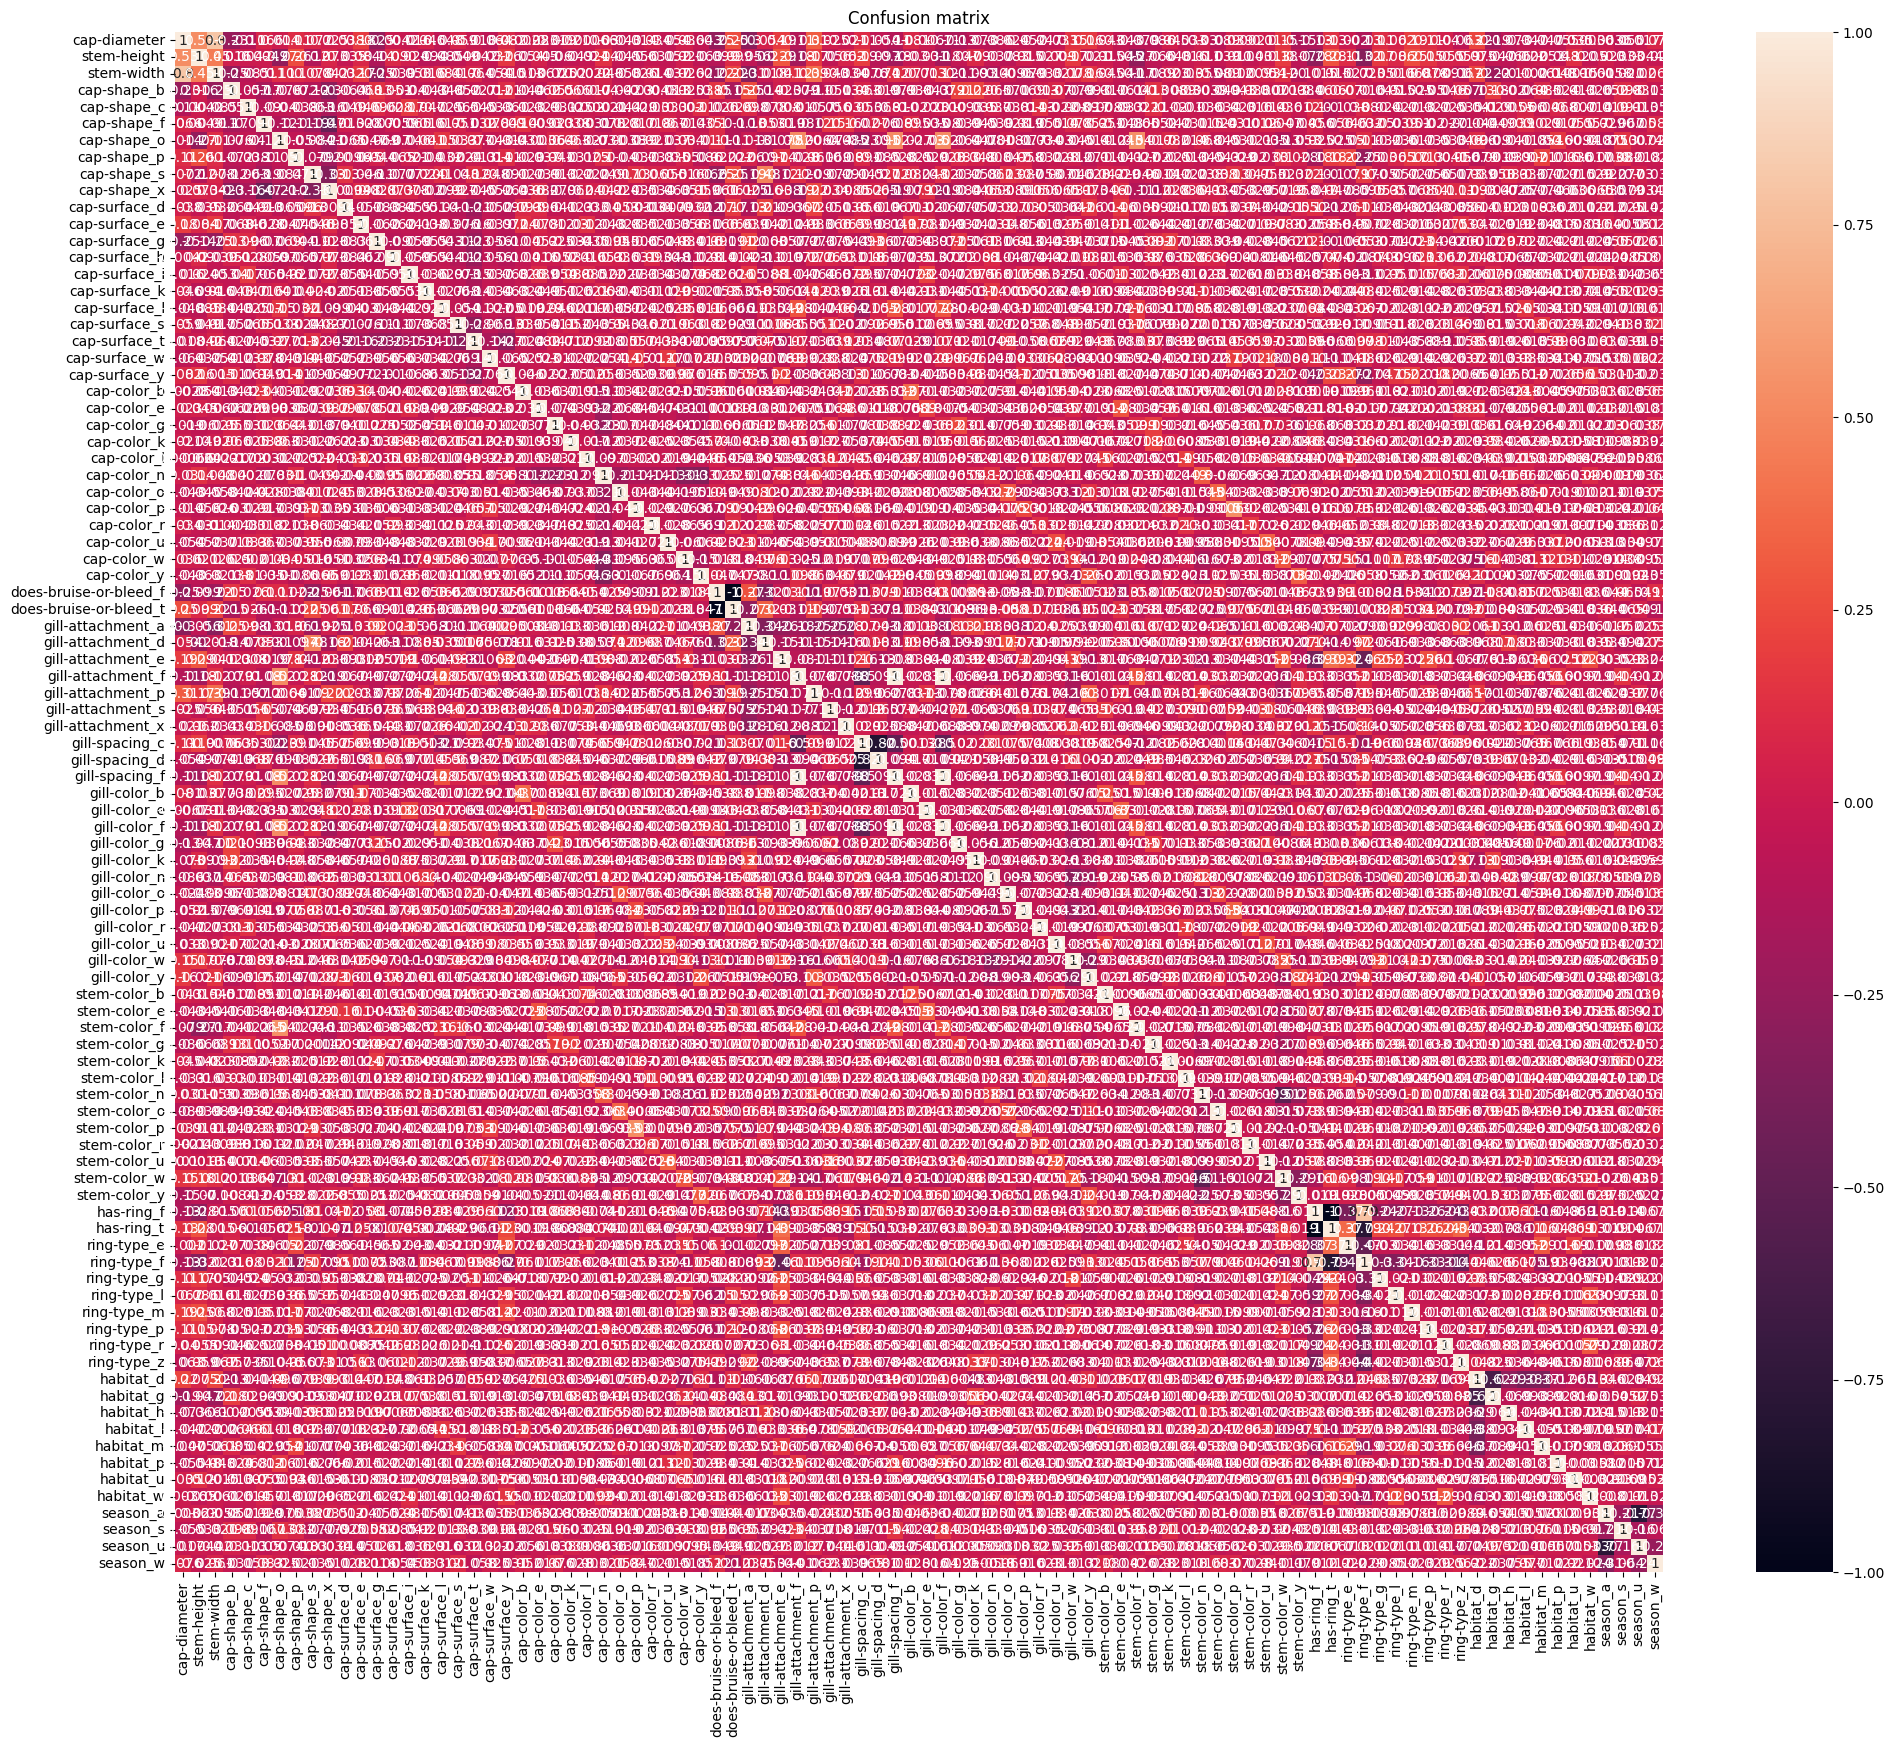

In [47]:
train_corr = X_preprocessed.corr(numeric_only = True)
plt.figure(figsize = (24, 20)) #change size of figure
plt.title('Confusion matrix')
sns.heatmap(train_corr, annot = True) #correlation matrix


## <span dir = "rtl">מטריצת מתאם לכל העמודות עם עמודת המטרה</span>


In [48]:
full_corr = pd.concat([X_preprocessed,y_train], axis= 1).corr()
full_corr
#concat combines multiple DataFrames or Series into a single unified DataFrame

cap-diameter  stem-height  stem-width  cap-shape_b  cap-shape_c  \
cap-diameter      1.000000     0.530939    0.801450    -0.234717    -0.110534   
stem-height       0.530939     1.000000    0.448121     0.016205     0.004232   
stem-width        0.801450     0.448121    1.000000    -0.246068    -0.084862   
cap-shape_b      -0.234717     0.016205   -0.246068     1.000000    -0.057305   
cap-shape_c      -0.110534     0.004232   -0.084862    -0.057305     1.000000   
...                    ...          ...         ...          ...          ...   
season_a         -0.003602     0.023063   -0.005833    -0.052499    -0.019338   
season_s         -0.054792    -0.032949   -0.020648     0.097866     0.091444   
season_u         -0.017339     0.004417   -0.020382     0.031421     0.012637   
season_w          0.075987    -0.025121    0.060592    -0.031053    -0.053267   
class             0.018323     0.010801   -0.006423    -0.026330     0.025193   

              cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  \
cap-diameter     0.065674     0.013761     0.110657     0.072015     0.024812   
stem-height      0.004897    -0.270336     0.256916    -0.117709     0.073160   
stem-width      -0.010824     0.111396     0.103179     0.078038     0.041693   
cap-shape_b     -0.170165    -0.076196    -0.071556    -0.119644    -0.296331   
cap-shape_c     -0.090262    -0.040417    -0.037956    -0.063464    -0.157185   
...                   ...          ...          ...          ...          ...   
season_a         0.029309    -0.075175    -0.003772     0.021505     0.034763   
season_s        -0.066577     0.134240     0.082326    -0.076690    -0.079053   
season_u        -0.050446     0.007438    -0.018135     0.029808     0.003398   
season_w         0.082863     0.024739    -0.021318    -0.034669    -0.011009   
class            0.006793          NaN    -0.013551     0.000233     0.006882   

              ...  habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  \
cap-diameter  ...  -0.047265  -0.047037  -0.054903   0.034707   0.003580   
stem-height   ...  -0.021657   0.005169  -0.048422   0.119986  -0.050466   
stem-width    ...  -0.002033  -0.060643   0.047775   0.001457   0.006101   
cap-shape_b   ...  -0.063838   0.084986  -0.024162  -0.013260  -0.025803   
cap-shape_c   ...   0.065872  -0.040365   0.068013  -0.007034  -0.013687   
...           ...        ...        ...        ...        ...        ...   
season_a      ...  -0.005698  -0.023496   0.011912  -0.009340   0.007952   
season_s      ...   0.006990   0.061199  -0.015488   0.006884  -0.016539   
season_u      ...  -0.041496   0.005530   0.007127  -0.005348   0.012545   
season_w      ...   0.076915  -0.011700  -0.022460   0.020991  -0.023985   
class         ...   0.022571   0.033686        NaN        NaN        NaN   

              season_a  season_s  season_u  season_w     class  
cap-diameter -0.003602 -0.054792 -0.017339  0.075987  0.018323  
stem-height   0.023063 -0.032949  0.004417 -0.025121  0.010801  
stem-width   -0.005833 -0.020648 -0.020382  0.060592 -0.006423  
cap-shape_b  -0.052499  0.097866  0.031421 -0.031053 -0.026330  
cap-shape_c  -0.019338  0.091444  0.012637 -0.053267  0.025193  
...                ...       ...       ...       ...       ...  
season_a      1.000000 -0.210839 -0.769813 -0.305752 -0.016359  
season_s     -0.210839  1.000000 -0.162063 -0.064368 -0.009851  
season_u     -0.769813 -0.162063  1.000000 -0.235019  0.020911  
season_w     -0.305752 -0.064368 -0.235019  1.000000 -0.004594  
class        -0.016359 -0.009851  0.020911 -0.004594  1.000000  

[93 rows x 93 columns]

In [49]:
print(full_corr['class'].sort_values().to_string())

stem-color_p             -0.076864
stem-color_u             -0.076147
gill-color_p             -0.063609
stem-color_e             -0.057594
cap-color_g              -0.051654
gill-attachment_s        -0.049141
cap-color_w              -0.044229
cap-surface_t            -0.043363
gill-color_g             -0.036227
habitat_h                -0.033923
does-bruise-or-bleed_f   -0.029660
cap-surface_g            -0.029647
cap-shape_b              -0.026330
habitat_g                -0.020838
ring-type_p              -0.019052
season_a                 -0.016359
stem-color_l             -0.015620
gill-spacing_d           -0.015069
cap-shape_p              -0.013551
gill-attachment_e        -0.012301
gill-color_n             -0.011659
ring-type_e              -0.011568
season_s                 -0.009851
stem-width               -0.006423
stem-color_w             -0.006133
season_w                 -0.004594
habitat_d                -0.003379
cap-surface_y            -0.003353
has-ring_f          

# <span dir = "rtl">למידת מכונה</span>

## <span dir = "rtl">הפייפליין של למידת מכונה</span>


In [50]:
placeholder_classifier = KNeighborsClassifier()
#putting KNN as the default

In [51]:
classify_steps = [('preprocess', preprocessor),
                  ('classify', placeholder_classifier)]
#the steps of the classification

In [52]:
clf = Pipeline(steps= classify_steps)
clf
#shows the steps of the pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('impute',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('num',
                                                                   SimpleImputer(),
                                                                   ['cap-diameter',
                                                                    'stem-height',
                                                                    'stem-width']),
                                                                  ('nom',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['cap-shape',
                                                                    'cap-surface',
                                                                    'cap-color',
                                                                    'does-bruise-or-bleed',
                                                                    'gill-attachment',
                                                                    'g...
                                                                    'has-ring',
                                                                    'ring-type',
                                                                    'habitat',
                                                                    'season'])],
                                                    verbose_feature_names_out=False)),
                                 ('outliers',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('num',
                                                                   Winsorizer(),
                                                                   ['cap-diameter',
                                                                    'stem-height',
                                                                    'stem-width'])],
                                                    verbose_feature_names_out=False)),
                                 ('scale', MinMaxScaler())])),
                ('classify', KNeighborsClassifier())])

## <span dir = "rtl">הכנת חיפוש גריד</span>


In [53]:
grid = [{'preprocess__outliers__num': [helpers.identity_transformer, Winsorizer(), Winsorizer(capping_method= 'iqr')],
         'preprocess__scale': [MinMaxScaler(), RobustScaler()],
         'classify': [KNeighborsClassifier()],
         'classify__n_neighbors': [1, 10, 100]},
        {'preprocess__outliers__num': [helpers.identity_transformer, Winsorizer(), Winsorizer(capping_method= 'iqr')],
         'preprocess__scale': [MinMaxScaler(), RobustScaler()],
         'classify': [SVC(random_state= seed)],
         'classify__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'classify__C': [0.1, 1, 10, 100]}]
#

In [54]:
scorer = make_scorer(accuracy_score)

In [55]:
gs = GridSearchCV(estimator= clf,
                  param_grid= grid,
                  scoring = scorer,
                  n_jobs = -1,
                  verbose= 10,
                  error_score= 'raise')
# GridSearchCV checks every combination and gives it a score between 0 and 1
# GridSearchCV divides the train and test to 5 groups and and checks the combinations on the groups and checks the accuracy and the score of the combination is the average of the accuracies

חיפוש גריד

In [58]:
gs = helpers.fit(gs, X_train, y_train)

original fit duration: 03:12:18


In [59]:
gs.best_params_

{'classify': SVC(random_state=172),
 'classify__C': 100,
 'classify__kernel': 'rbf',
 'preprocess__outliers__num': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x000001F68357F100>),
 'preprocess__scale': RobustScaler()}

# <span dir = "rtl">הערכת ביצועים</span>

## <span dir = "rtl">חיזוי</span>


In [60]:
y_pred = helpers.predict(gs, X_test)

original predict duration: 00:00:04


## <span dir = "rtl">מצריצת הבלבול</span>


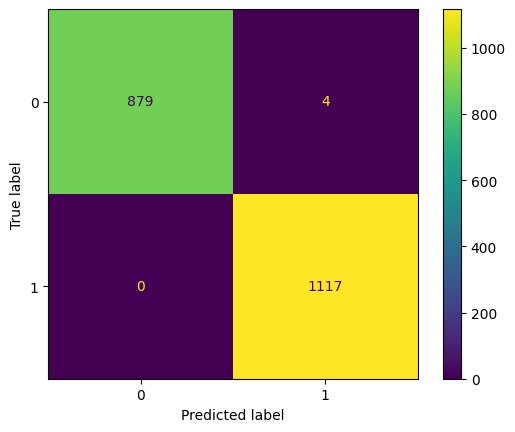

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## <span dir = "rtl">מדדי ביצועים</span>


In [62]:
print(classification_report(y_test, y_pred))
#accuracy =  right / everything
#precision = true positives / true positives + false positives
#recall = true positives / true positives + false negatives (all the real positives)
#f1 = 2 * precision * recall / precision + recall

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       883
           1       1.00      1.00      1.00      1117

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



## <span dir = "rtl">בדיקת התאמת יתר</span>


In [63]:
ax, best_params = helpers.plot_train_test_scores(gs, clf, scorer, X_train, X_test, y_train, y_test)

original plot duration: 01:52:01


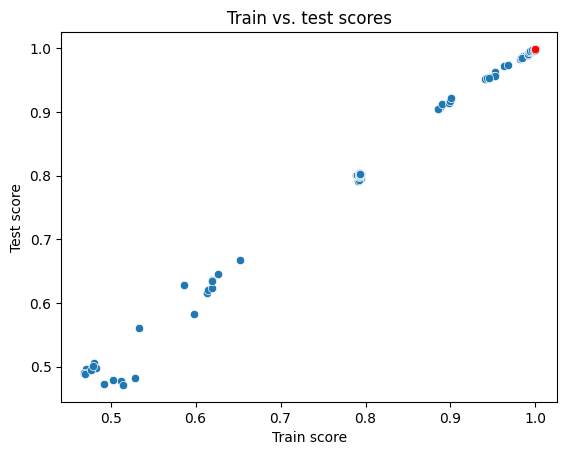

In [64]:
helpers.show_plot(ax)

In [65]:
best_params['train']
#the best combination for the train group

{'classify': SVC(C=100, kernel='sigmoid', random_state=172),
 'classify__C': 100,
 'classify__kernel': 'rbf',
 'preprocess__outliers__num': FunctionTransformer(feature_names_out='one-to-one',
                     func=<function <lambda> at 0x000001F68472FF60>),
 'preprocess__scale': RobustScaler()}

In [66]:
best_params['test']
#the best combination for the test group

{'classify': SVC(C=100, kernel='sigmoid', random_state=172),
 'classify__C': 100,
 'classify__kernel': 'rbf',
 'preprocess__outliers__num': Winsorizer(capping_method='iqr'),
 'preprocess__scale': RobustScaler()}

# <span dir = "rtl">סיכום</span>

## <span dir = "rtl">מסקנות</span>


<div dir=rtl>
אפשר לראות ממטריצת הבלבול ומהערכת הנתונים שהסיווג עבד בצורה טובה ובאחוזים גבוהים מאוד. בעזרת ה - gridsearchCV גיליתי שהשיטה הכי טובה לחזות את הטבלה היא SVM. דבר נוסף שיכל לעזור לי בחיזוי הטבלה הוא שהטבלה מאוזנת ויכול להיות שיש עמודות שמשפיעות בצורה משמעותית על העמודה הקטגוריאלית.
</div>

## <span dir = "rtl">רפלקציה</span>


<div dir= rtl>
נהניתי מאוד לעבוד על הפרויקט והעשרתי מאוד את הידע שלי במהלך הלמידה והעשייה. במהלך הלמידה נתקלתי במספר קשיים בלמידת החומר, והכרתי סוגים חדשים של גרפים.
</div>